In [2]:
#STA365_HW3
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from scipy import stats

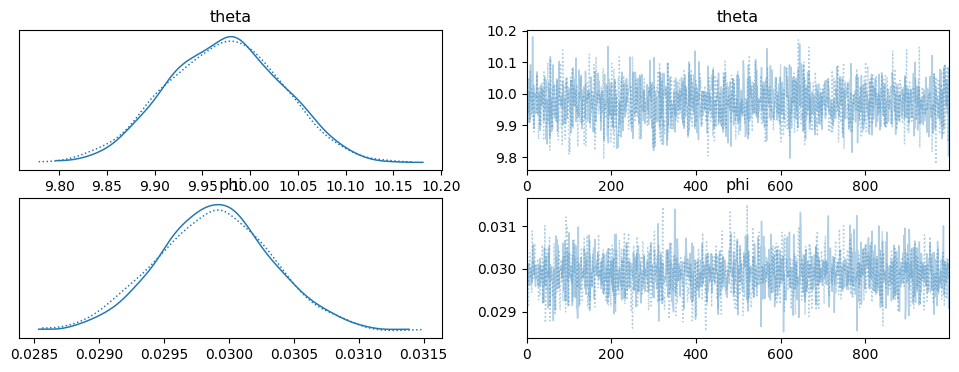

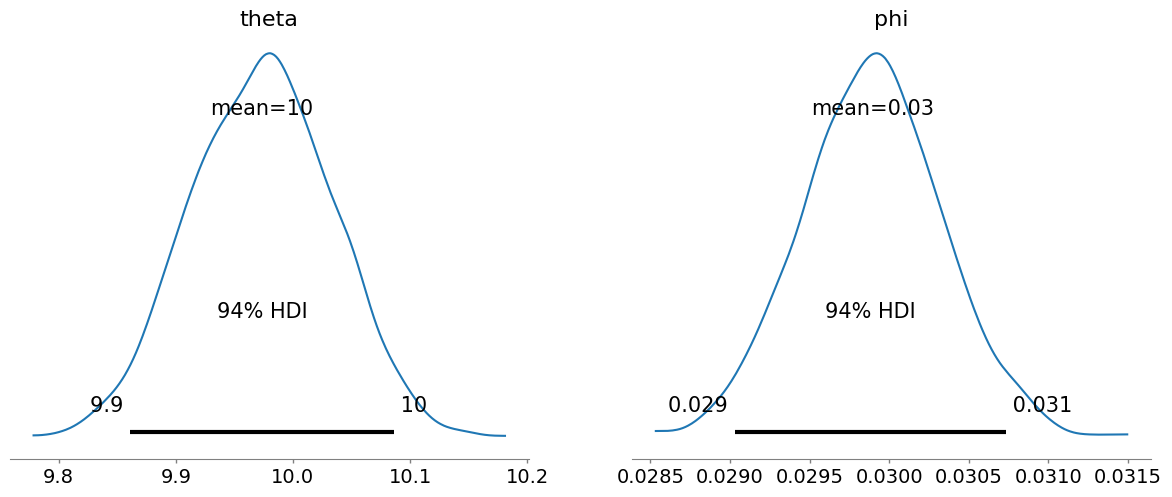

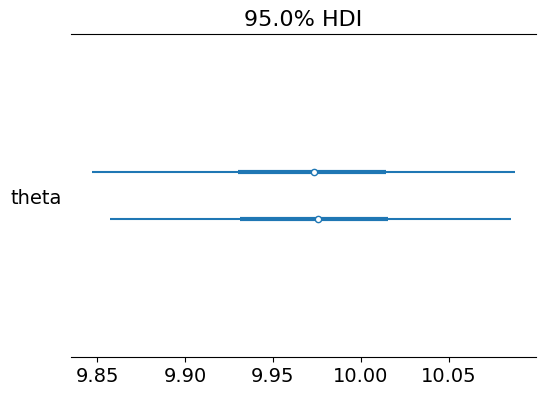

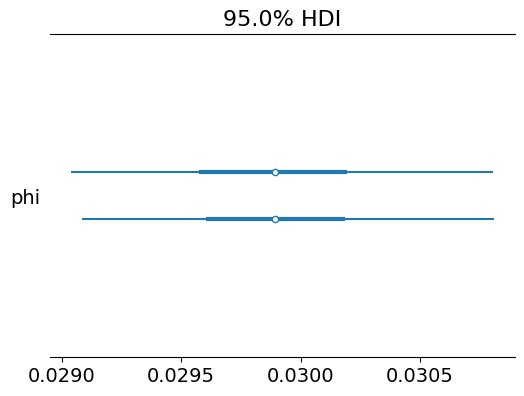

In [9]:
#read data
df = pd.read_csv('/content/heart_attack_prediction_dataset 3.csv')
#Provide posterior inference for a column of data with a PyMC *normal-gamma specification*.
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=df['Exercise Hours Per Week'])
    trace = pm.sample(1000, tune=1000)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    plt.show()
    az.plot_forest(trace, var_names=["theta"], combined=False, hdi_prob=0.95)
    az.plot_forest(trace, var_names=["phi"], combined=False, hdi_prob=0.95);

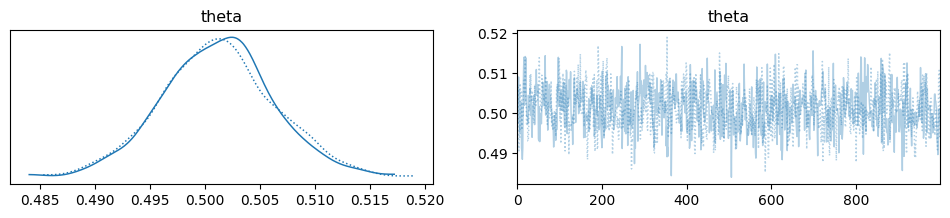

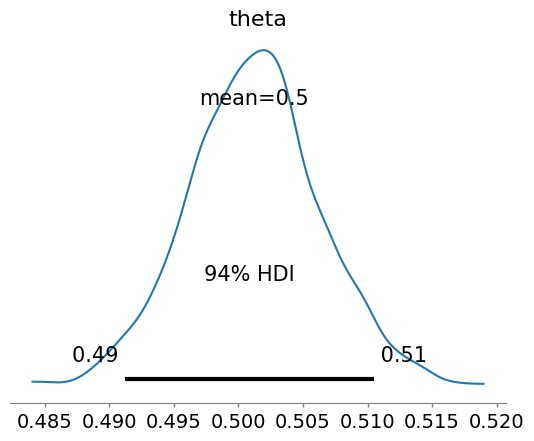

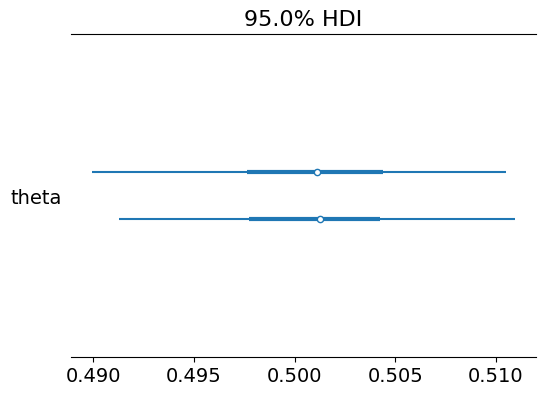

In [11]:
beta_binomial_toy_model = pm.Model()
with beta_binomial_toy_model:
    theta = pm.Beta("theta", alpha=1, beta=1)
    x_obs = pm.Binomial("likelihood", n=1, p=theta, observed=df['Obesity'])
    trace = pm.sample(1000, tune=1000)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    plt.show()
    az.plot_forest(trace, var_names=["theta"], combined=False, hdi_prob=0.95);